In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


2025-09-25 10:52:22.305024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758797542.679632      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758797542.784759      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.18.0


In [2]:
import tensorflow as tf, os

BASE = "/kaggle/input/intel-image-classification/seg_train/seg_train"
IMG_SIZE = (150, 150)
BATCH = 32
SEED = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    BASE, validation_split=0.2, subset="training", seed=SEED,
    image_size=IMG_SIZE, batch_size=BATCH
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    BASE, validation_split=0.2, subset="validation", seed=SEED,
    image_size=IMG_SIZE, batch_size=BATCH
)

class_names = train_ds.class_names
class_names


Found 14034 files belonging to 6 classes.
Using 11228 files for training.


I0000 00:00:1758797814.005047      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758797814.005672      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

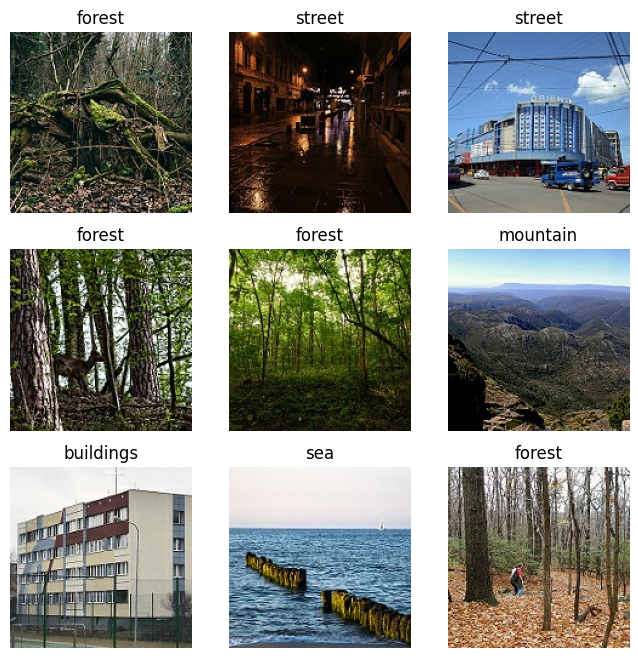

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [4]:
from tensorflow.keras import layers, models

# Performans için
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(1024).prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=IMG_SIZE+(3,)),
    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_ds, validation_data=val_ds, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


I0000 00:00:1758797920.914006     107 service.cc:148] XLA service 0x79334c00de20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758797920.915569     107 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758797920.915589     107 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758797921.237438     107 cuda_dnn.cc:529] Loaded cuDNN version 90300


 10/351 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2045 - loss: 3.2735  

I0000 00:00:1758797925.561431     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


351/351 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.4605 - loss: 1.4517 - val_accuracy: 0.7049 - val_loss: 0.8110
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6735 - loss: 0.8608 - val_accuracy: 0.7577 - val_loss: 0.6962
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7374 - loss: 0.7003 - val_accuracy: 0.7537 - val_loss: 0.6903
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7939 - loss: 0.5559 - val_accuracy: 0.7655 - val_loss: 0.6713
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8436 - loss: 0.4291 - val_accuracy: 0.7944 - val_loss: 0.6220


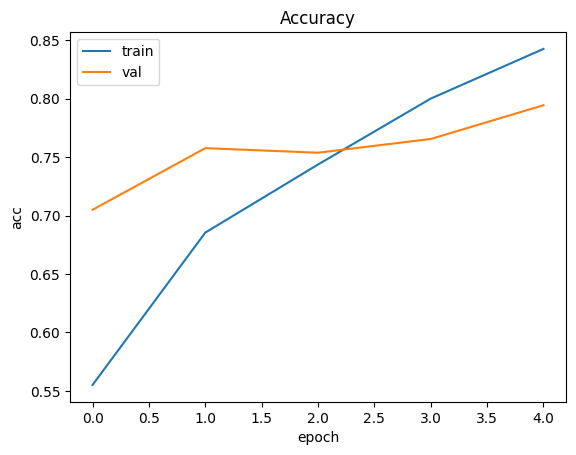

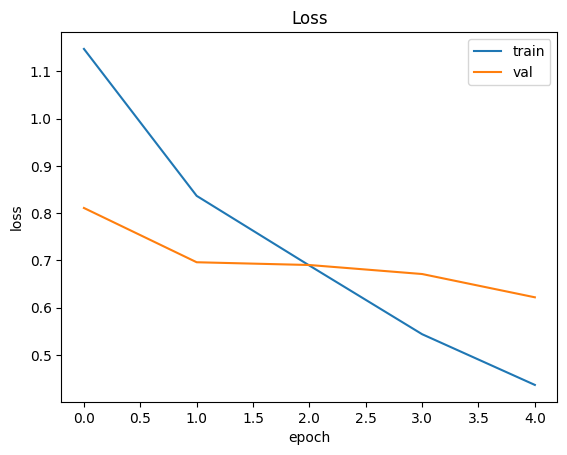

In [5]:
h = history.history
import matplotlib.pyplot as plt
plt.figure(); plt.plot(h["accuracy"]); plt.plot(h["val_accuracy"]); plt.title("Accuracy"); plt.legend(["train","val"]); plt.xlabel("epoch"); plt.ylabel("acc"); plt.show()
plt.figure(); plt.plot(h["loss"]); plt.plot(h["val_loss"]); plt.title("Loss"); plt.legend(["train","val"]); plt.xlabel("epoch"); plt.ylabel("loss"); plt.show()


In [6]:
TEST_DIR = "/kaggle/input/intel-image-classification/seg_test/seg_test"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH
)


Found 3000 files belonging to 6 classes.


In [7]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7852 - loss: 0.6346
Test Accuracy: 0.7946666479110718


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

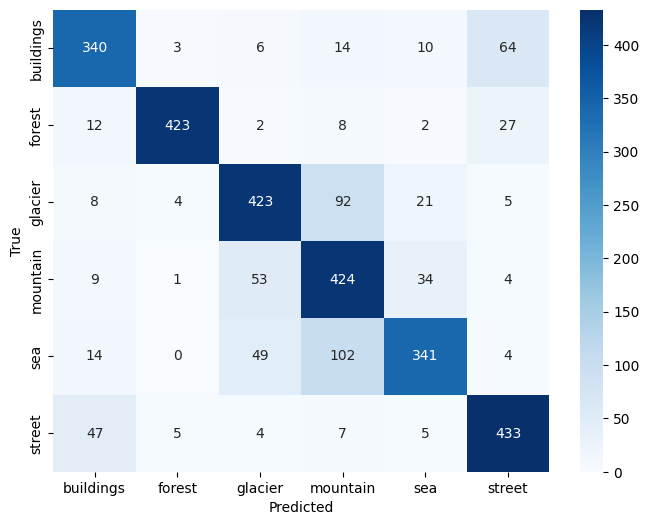

              precision    recall  f1-score   support

   buildings       0.79      0.78      0.78       437
      forest       0.97      0.89      0.93       474
     glacier       0.79      0.76      0.78       553
    mountain       0.66      0.81      0.72       525
         sea       0.83      0.67      0.74       510
      street       0.81      0.86      0.83       501

    accuracy                           0.79      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.80      0.79      0.80      3000



In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Tahminleri al
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))


In [9]:
import os
os.makedirs("assets", exist_ok=True)
print("assets/ klasörü hazır.")


assets/ klasörü hazır.


In [10]:
import matplotlib.pyplot as plt

h = history.history  # model.fit'ten geliyor
# Accuracy
plt.figure()
plt.plot(h["accuracy"], label="train")
plt.plot(h["val_accuracy"], label="val")
plt.title("Accuracy")
plt.xlabel("epoch"); plt.ylabel("acc"); plt.legend()
plt.tight_layout()
plt.savefig("assets/accuracy.png", dpi=150)
plt.close()

# Loss
plt.figure()
plt.plot(h["loss"], label="train")
plt.plot(h["val_loss"], label="val")
plt.title("Loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend()
plt.tight_layout()
plt.savefig("assets/loss.png", dpi=150)
plt.close()

print("Eğitim eğrileri kaydedildi: assets/accuracy.png, assets/loss.png")


Eğitim eğrileri kaydedildi: assets/accuracy.png, assets/loss.png


In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# y_true / y_pred üret
y_true, y_pred = [], []
for images, labels in test_ds:
    probs = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(probs, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Confusion matrix hesapla
cm = confusion_matrix(y_true, y_pred)

# Matplotlib ile çiz (seaborn şart değil)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)

# Hücre değerlerini yaz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.savefig("assets/confusion.png", dpi=150)
plt.close()

print("Confusion matrix kaydedildi: assets/confusion.png")


Confusion matrix kaydedildi: assets/confusion.png


In [12]:
report = classification_report(y_true, y_pred, target_names=class_names)
with open("assets/report.txt", "w", encoding="utf-8") as f:
    f.write(report)

print("Classification report kaydedildi: assets/report.txt")


Classification report kaydedildi: assets/report.txt


In [13]:
print(os.listdir("assets"))


['confusion.png', 'loss.png', 'accuracy.png', 'report.txt']
